In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import sys
from datetime import datetime
from tqdm import tqdm
import dill
import scipy
import matplotlib.pyplot as plt
import math
import seaborn as sns
import importlib
from tqdm import tqdm
from adjustText import adjust_text
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

np.random.seed(0)

paper_path = os.path.dirname(os.getcwd())#"/mnt/x/Common/Lab_Papers/shedding_potential/"

fig2_path = paper_path + "/fig2/"
# rev_path = paper_path+"/Submission folder/MSB/Revision/"
apoptosis_edf_path = paper_path + "/ev_apoptosis/"
utils_path = paper_path + "/utils/"
shed_sc_dataset = paper_path + "/external_datasets/shedSC_bahar_halpern_2023/"
os.chdir(utils_path)
print(os.getcwd())
import shed_funcs



LOAD_ARIAL = True
if LOAD_ARIAL:
    # set the default font to Arial
    from matplotlib.font_manager import FontProperties, fontManager
    from matplotlib import rcParams
    # Path to Arial font
    arial_path = utils_path+'/Arial.ttf'

    # Define font properties with the specific path
    arial_font = FontProperties(fname=arial_path)
    fontManager.addfont(arial_path)

    # Set the font as the default for all text elements
    rcParams['font.family'] = arial_font.get_family()
    rcParams['font.sans-serif'] = [arial_font.get_name()]

    print("scanpy " + str(sc.__version__))
    print("pandas " + str(pd.__version__))
    print("numpy " + str(np.__version__))
    print("scipy " + str(scipy.__version__))

/mnt/x/common/Lab_Papers/shedding_potential/zenodo/utils
scanpy 1.11.2
pandas 2.3.0
numpy 2.2.6
scipy 1.15.3


## Load Bahar Halpern shed cells bulk

In [2]:
df = sc.read_csv(fig2_path+'keren_mouse_data.csv')
df = df.T
df

mdata = sc.AnnData(df)
# split mdata.obs_names into segment,type and name
mdata.obs['mouse'] = mdata.obs_names.str.split('-').str[1].str.lower()
mdata.obs['segment'] = mdata.obs_names.str.split('-').str[2].str.lower()
mdata.obs['type'] = mdata.obs_names.str.split('-').str[3].str.lower()

sample_type_dict = {'f': 'wash', 't': 'biopsy'}
mdata.obs['type'] = mdata.obs['type'].map(sample_type_dict)

mdata.layers['counts'] = mdata.X.copy()
mdata.layers['mat_norm'] = sc.pp.normalize_total(mdata, target_sum=1, inplace=False,exclude_highly_expressed=True, max_fraction=0.1)['X']

print(mdata.shape)
mdata = mdata[mdata.obs['segment'] == 'jej']
print(mdata.shape)
mdata

(87, 17891)
(18, 17891)


View of AnnData object with n_obs × n_vars = 18 × 17891
    obs: 'mouse', 'segment', 'type'
    layers: 'counts', 'mat_norm'

## Load Bahar Halpern shed cells single cell 

In [3]:
# sc_counts_path = "/mnt/x/talbarka/datasets/keren_shed_cell_paper/Count_tables_and_Objects/BG_subtracted_count_table_all_Enterocytes_after_filt.txt"
sc_counts_path = shed_sc_dataset+"/BG_subtracted_count_table_all_Enterocytes_after_filt.txt"

shed_ad = sc.read(sc_counts_path, delimiter="\t")
shed_ad = shed_ad.transpose()
# sc_metadata_path = "/mnt/x/talbarka/datasets/keren_shed_cell_paper/Count_tables_and_Objects/Metadata_all_Enterocytes_after_filteration.txt"
sc_metadata_path = shed_sc_dataset+"/Metadata_all_Enterocytes_after_filteration.txt"
metadata = pd.read_csv(sc_metadata_path, sep="\t", index_col=0)
shed_ad.obs = metadata
shed_ad.obs['type'] = 'scRNAseq'

shed_ad.layers['counts'] = shed_ad.X.copy()
shed_ad.layers['mat_norm'] = sc.pp.normalize_total(shed_ad, target_sum=1, inplace=False)['X']
shed_ad

/home/talbarka/miniconda3/envs/turnover_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/talbarka/miniconda3/envs/turnover_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3070 × 17627
    obs: 'barcodes', 'plate', 'run', 'percent.mito', 'nCount_RNA', 'nFeature_RNA', 'segment', 'source', 'cellName', 'percent.mt', 'seurat_clusters', 'RNA_snn_res.0.8', 'x', 'y', 'ident', 'type'
    layers: 'counts', 'mat_norm'

In [4]:
# sc_counts_path = "/mnt/x/talbarka/datasets/keren_shed_cell_paper/Count_tables_and_Objects/BG_subtracted_count_table_all_Fecal_cells_after_filt.txt"
sc_counts_path = shed_sc_dataset+"/BG_subtracted_count_table_all_Fecal_cells_after_filt.txt"

shed_ad_all = sc.read(sc_counts_path, delimiter=",")
shed_ad_all = shed_ad_all.transpose()
# sc_metadata_path = "/mnt/x/talbarka/datasets/keren_shed_cell_paper/Count_tables_and_Objects/Metadata_all_Fecal_cells_after_filteration.txt"
sc_metadata_path = shed_sc_dataset+"/Metadata_all_Fecal_cells_after_filteration.txt"
metadata = pd.read_csv(sc_metadata_path, sep="\t", index_col=0)
shed_ad_all.obs = metadata
shed_ad_all.obs['type'] = 'scRNAseq'

shed_ad_all.layers['counts'] = shed_ad_all.X.copy()
shed_ad_all.layers['mat_norm'] = sc.pp.normalize_total(shed_ad_all, target_sum=1, inplace=False)['X']
shed_ad_all

AnnData object with n_obs × n_vars = 1716 × 15905
    obs: 'nCount_RNA', 'nFeature_RNA', 'plate', 'segment', 'run', 'source', 'barcodes', 'percent.mt', 'seurat_clusters', 'cellName', 'RNA_snn_res.0.8', 'Idents', 'type'
    layers: 'counts', 'mat_norm'

In [5]:
# add eta for the single cell epithelium
shed_ad_epi = shed_ad#[shed_ad.obs['Idents'] == "Enterocytes"].copy()
# taken from Figure 1-BC Moor2018 https://www.sciencedirect.com/science/article/pii/S0092867418311644
tip_markers = ["2010109l03Rik",'Acad9','Ada','Ap1g1','Apoa4','Apoc3','Cep57','Cfap20','Chchhd1','Chek2',
               'Clca4a','Cldn7','Fgs4','Gcn1l1','Glipr1','Gm10680','Gm20594','Ifrd1','Krt20','Lgals3',
               'Lrrc41','Mrpl48','Mto7a','Olfr1385','Olfr46','Pam','Pkib','Pmp22','Psma7','Rab34',
               'S100a10','S100a6','Serpinb1a','Slc17a5','Slc25a22','Slc28a2','Ssbp2','Tbk1','Tlr1','Tmsb4x','Ythdc2','Zfp280d']
bottom_markers = ['2010107E04Rik','2210407C18Rik','Atp5a1','Atp5e','Atp5g3','Atp5h','Atp5j2','Atp5l','Atp5o','Atpif1',
                  'Ccl25','Chchd10','Ckmt1','Cox4i1','Cox5a','Cox5b','Cox6b1','Cox6c','Cox7a1','Cox7a2','Cox7b',
                  'Fabp1','Gpx2','Gsta1','Lgals4','Lypd8','Minos1','Ndufa1','Ndufa4','Ndufa5','Ndufb6','Ndufb8','Ndufc1',
                  'Plac8','Reg3b','Reg3g','Rpl18','Rpl35a','Rpl38','Rpl39','Rpl41','Rplp1','Rps12','Rps14','Rps18','Rps2',
                  'Rps27','Rps27l','Rps28','Rps29','Rps8','Sis','Spink4','Tm4sf5','Tma7','Txn1','Uba52','Uqcr10','Uqcr11','Uqcrh','Uqcrq']

tip_markers_sum = shed_ad_epi[:,np.intersect1d(shed_ad_epi.var_names, tip_markers)].X.sum(axis=1)
bottom_markers_sum = shed_ad_epi[:,np.intersect1d(shed_ad_epi.var_names, bottom_markers)].X.sum(axis=1)
eta = tip_markers_sum / (tip_markers_sum + bottom_markers_sum)
shed_ad_epi.obs['eta'] = list(eta)

shed_ad_epi.obs['source'] = shed_ad_epi.obs['source'].astype(str)
shed_ad_epi.obs.loc[shed_ad_epi.obs['source'] == "POOP", "source"] = "Shed cells"
shed_ad_epi.obs['detailed_source'] = shed_ad_epi.obs['source'].astype(str)
shed_ad_epi.obs.loc[shed_ad_epi.obs['detailed_source'] == "Tissue", 'detailed_source'] = pd.qcut(shed_ad_epi[shed_ad_epi.obs['detailed_source'] == "Tissue"].obs['eta'], 6, labels=['V1','V2','V3','V4','V5','V6'])
shed_ad_epi.obs.head()

barcodes                     plate         run  \
Tissue_cell 21_1   ACCAGTG  1_sort181118_m1_F1big_p1  sort181118   
Tissue_cell 25_1   ACGCTTC  1_sort181118_m1_F1big_p1  sort181118   
Tissue_cell 29_1   ACGTGGT  1_sort181118_m1_F1big_p1  sort181118   
Tissue_cell 37_1   ACTTGGC  1_sort181118_m1_F1big_p1  sort181118   
Tissue_cell 119_1  CATGGAT  1_sort181118_m1_F1big_p1  sort181118   

                   percent.mito  nCount_RNA  nFeature_RNA segment  source  \
Tissue_cell 21_1       0.000479        4175          1049     Jej  Tissue   
Tissue_cell 25_1       0.002750        6545          1991     Jej  Tissue   
Tissue_cell 29_1       0.002064        2423           961     Jej  Tissue   
Tissue_cell 37_1       0.000572        1749           817     Jej  Tissue   
Tissue_cell 119_1      0.002483        1208           532     Jej  Tissue   

                   cellName  percent.mt  seurat_clusters  RNA_snn_res.0.8  \
Tissue_cell 21_1    cell 21   19.784431                7                7   
Tissue_cell 25_1    cell 25    8.220015                6                6   
Tissue_cell 29_1    cell 29    8.914569                2                2   
Tissue_cell 37_1    cell 37    1.600915                2                2   
Tissue_cell 119_1  cell 119    7.781457                1                1   

                          x         y  ident      type       eta  \
Tissue_cell 21_1   2.181516 -1.322464      7  scRNAseq  0.537037   
Tissue_cell 25_1  -5.344159  2.338248      6  scRNAseq  0.112985   
Tissue_cell 29_1  -1.681326  1.235752      2  scRNAseq  0.244828   
Tissue_cell 37_1  -4.097040  2.484944      2  scRNAseq  0.076923   
Tissue_cell 119_1  0.147023  1.925995      1  scRNAseq  0.375000   

                  detailed_source  
Tissue_cell 21_1               V5  
Tissue_cell 25_1               V2  
Tissue_cell 29_1               V4  
Tissue_cell 37_1               V2  
Tissue_cell 119_1              V4

<Axes: xlabel='x', ylabel='y'>

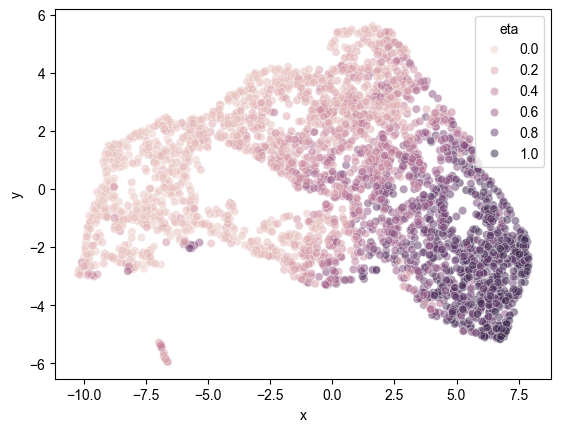

In [6]:
sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='eta', alpha=0.5)

In [7]:
mdata_tip_sum = mdata[:,np.intersect1d(mdata.var_names, tip_markers)].X.sum(axis=1)
mdata_bottom_sum = mdata[:,np.intersect1d(mdata.var_names, bottom_markers)].X.sum(axis=1)
mdata.obs['eta'] = list(mdata_tip_sum / (mdata_tip_sum + mdata_bottom_sum))
mdata.obs['detailed_source'] = mdata.obs['type']
mdata

/tmp/ipykernel_236887/766648025.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  mdata.obs['eta'] = list(mdata_tip_sum / (mdata_tip_sum + mdata_bottom_sum))


AnnData object with n_obs × n_vars = 18 × 17891
    obs: 'mouse', 'segment', 'type', 'eta', 'detailed_source'
    layers: 'counts', 'mat_norm'

In [8]:
# load apoptosis genes 
# downloaded from https://www.gsea-msigdb.org/gsea/msigdb/mouse/geneset/HALLMARK_APOPTOSIS.html 07/05/2025
apoptosis_gs = pd.read_csv(paper_path + "/external_datasets/HALLMARK_APOPTOSIS.v2024.1.Mm.tsv", sep="\t", index_col=0)
apoptosis_gs = apoptosis_gs.loc["GENE_SYMBOLS","HALLMARK_APOPTOSIS"]
apoptosis_gs = apoptosis_gs.split(',')
apoptosis_gs_epi = np.intersect1d(apoptosis_gs, shed_ad_epi.var_names)
apoptosis_gs_epi

array(['Add1', 'Aifm3', 'Ank', 'Anxa1', 'App', 'Atf3', 'Bax', 'Bcap31',
       'Bcl10', 'Bcl2l1', 'Bcl2l11', 'Bcl2l2', 'Bgn', 'Bid', 'Birc3',
       'Bmf', 'Bmp2', 'Bnip3l', 'Brca1', 'Btg2', 'Btg3', 'Casp1', 'Casp2',
       'Casp3', 'Casp4', 'Casp6', 'Casp7', 'Casp8', 'Casp9', 'Cav1',
       'Ccna1', 'Ccnd1', 'Ccnd2', 'Cd14', 'Cd2', 'Cd38', 'Cd44', 'Cd69',
       'Cdc25b', 'Cdk2', 'Cdkn1a', 'Cdkn1b', 'Cflar', 'Clu', 'Crebbp',
       'Cth', 'Ctnnb1', 'Cyld', 'Dap', 'Dap3', 'Dcn', 'Ddit3', 'Dffa',
       'Diablo', 'Dnaja1', 'Dnajc3', 'Dnm1l', 'Dpyd', 'Ebp', 'Emp1',
       'Eno2', 'Erbb2', 'Erbb3', 'Ereg', 'Etf1', 'F2r', 'Fas', 'Fasl',
       'Fdxr', 'Fez1', 'Gadd45a', 'Gadd45b', 'Gch1', 'Gna15', 'Gpx1',
       'Gpx3', 'Gpx4', 'Gsn', 'Gsr', 'Gstm2', 'H1f0', 'Hgf', 'Hmgb2',
       'Hmox1', 'Hspb1', 'Ier3', 'Ifitm3', 'Ifngr1', 'Igf2r', 'Igfbp6',
       'Il18', 'Il1a', 'Il1b', 'Il6', 'Irf1', 'Isg20', 'Jun', 'Krt18',
       'Lef1', 'Lgals3', 'Lmna', 'Lum', 'Madd', 'Mcl1', 'Mgmt', 'Mmp2',
    

## Load Moor's data

In [9]:
moor_data_path =  fig2_path+'table_B_scRNAseq_UMI_counts.tsv'
moor_data = pd.read_csv(moor_data_path, index_col=0, sep='\t')
moor_data = moor_data.T

moor_zones_path = fig2_path+'table_C_scRNAseq_tsne_coordinates_zones.tsv'
moor_zones = pd.read_csv(moor_zones_path, index_col=0, sep='\t')

moor_adata = sc.AnnData(moor_data)
moor_adata.obs = moor_zones.loc[moor_adata.obs_names]

# normalize
moor_adata.layers['counts'] = moor_adata.X.copy()
moor_adata.layers['mat_norm'] = sc.pp.normalize_total(moor_adata, target_sum=1, inplace=False, exclude_highly_expressed=True, max_fraction=0.1)['X']

moor_adata.obsm['X_tsne'] = moor_adata.obs[['tSNE_coordinate_1','tSNE_coordinate_2']].values
moor_adata

AnnData object with n_obs × n_vars = 1383 × 27998
    obs: 'tSNE_coordinate_1', 'tSNE_coordinate_2', 'zone'
    obsm: 'X_tsne'
    layers: 'counts', 'mat_norm'

In [10]:
# load apoptosis genes (downloaded from https://www.gsea-msigdb.org/gsea/msigdb/cards/apoptosis_gs , May 7th, 2025)
apoptosis_gs = pd.read_csv(paper_path + "/external_datasets/HALLMARK_APOPTOSIS.v2024.1.Mm.tsv", sep="\t", index_col=0)
apoptosis_gs = apoptosis_gs.loc["GENE_SYMBOLS","HALLMARK_APOPTOSIS"]
apoptosis_gs = apoptosis_gs.split(',')
apoptosis_gs = np.intersect1d(apoptosis_gs, moor_adata.var_names)
apoptosis_gs

array(['Add1', 'Aifm3', 'Ank', 'Anxa1', 'App', 'Atf3', 'Avpr1a', 'Bax',
       'Bcap31', 'Bcl10', 'Bcl2l1', 'Bcl2l10', 'Bcl2l11', 'Bcl2l2', 'Bgn',
       'Bid', 'Bik', 'Birc3', 'Bmf', 'Bmp2', 'Bnip3l', 'Brca1', 'Btg2',
       'Btg3', 'Casp1', 'Casp2', 'Casp3', 'Casp4', 'Casp6', 'Casp7',
       'Casp8', 'Casp9', 'Cav1', 'Ccna1', 'Ccnd1', 'Ccnd2', 'Cd14', 'Cd2',
       'Cd38', 'Cd44', 'Cd69', 'Cdc25b', 'Cdk2', 'Cdkn1a', 'Cdkn1b',
       'Cflar', 'Clu', 'Crebbp', 'Cth', 'Ctnnb1', 'Cyld', 'Dap', 'Dap3',
       'Dcn', 'Ddit3', 'Dffa', 'Diablo', 'Dnaja1', 'Dnajc3', 'Dnm1l',
       'Dpyd', 'Ebp', 'Egr3', 'Emp1', 'Eno2', 'Erbb2', 'Erbb3', 'Ereg',
       'Etf1', 'F2', 'F2r', 'Fas', 'Fasl', 'Fdxr', 'Fez1', 'Gadd45a',
       'Gadd45b', 'Gch1', 'Gna15', 'Gpx1', 'Gpx3', 'Gpx4', 'Gsn', 'Gsr',
       'Gstm2', 'Gucy2e', 'H1f0', 'Hgf', 'Hmgb2', 'Hmox1', 'Hspb1',
       'Ier3', 'Ifitm3', 'Ifnb1', 'Ifngr1', 'Igf2r', 'Igfbp6', 'Il18',
       'Il1a', 'Il1b', 'Il6', 'Irf1', 'Isg20', 'Jun', 'Krt18', 'Lef1',


### compare with and without apoptosis genes

/mnt/x/common/Lab_Papers/shedding_potential/zenodo/utils/shed_funcs.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = model.params[0] + model.params[1] * x  # params[0] is the intercept, params[1] is the slope


Correlation: 0.9549906702348889, p-value: 0.0


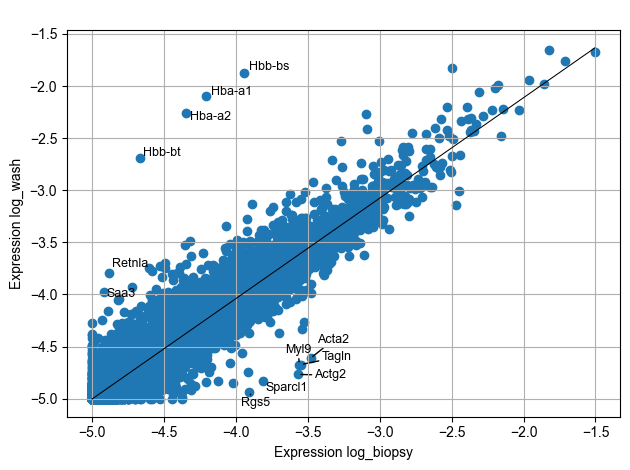

In [11]:
df = sc.read_csv(fig2_path+'keren_mouse_data.csv')
df = df.T
df

mdata = sc.AnnData(df)
# split mdata.obs_names into segment,type and name
mdata.obs['mouse'] = mdata.obs_names.str.split('-').str[1].str.lower()
mdata.obs['segment'] = mdata.obs_names.str.split('-').str[2].str.lower()
mdata.obs['type'] = mdata.obs_names.str.split('-').str[3].str.lower()

sample_type_dict = {'f': 'wash', 't': 'biopsy'}
mdata.obs['type'] = mdata.obs['type'].map(sample_type_dict)

mdata.layers['counts'] = mdata.X.copy()
mdata.layers['mat_norm'] = sc.pp.normalize_total(mdata, target_sum=1, inplace=False,exclude_highly_expressed=True, max_fraction=0.1)['X']
mdata.layers['log_norm'] = sc.pp.log1p(sc.pp.normalize_total(mdata, target_sum=10000, inplace=False,exclude_highly_expressed=True, max_fraction=0.1)['X'], copy=True)
mdata.layers['log_zscore'] = mdata.layers['log_norm'].copy()
mdata.X = mdata.layers['log_zscore'].copy()
sc.pp.scale(mdata, layer='log_zscore', max_value=10)
mdata = mdata[mdata.obs['segment'] == 'jej']
importlib.reload(shed_funcs)
USE_LOG = False
resids = shed_funcs.calc_resids_by_field(mdata, "type", "biopsy", "wash", RESID_THRESH=0.9, title=" ",layer='mat_norm', )

In [12]:
# load apoptosis genes (downloaded from https://www.gsea-msigdb.org/gsea/msigdb/cards/apoptosis_gs , May 7th, 2025)
apoptosis_gs = pd.read_csv(paper_path + "/external_datasets/HALLMARK_APOPTOSIS.v2024.1.Mm.tsv", sep="\t", index_col=0)
apoptosis_gs = apoptosis_gs.loc["GENE_SYMBOLS","HALLMARK_APOPTOSIS"]
apoptosis_gs = apoptosis_gs.split(',')
apoptosis_gs

['Mcl1',
 'F2r',
 'Cav1',
 'Wee1',
 'Rela',
 'Brca1',
 'Cdkn1a',
 'Cdkn1b',
 'Tgfbr3',
 'Fdxr',
 'Gpx4',
 'Cdk2',
 'Tnf',
 'Pea15a',
 'Ier3',
 'Gpx1',
 'Satb1',
 'Gpx3',
 'Gucy2e',
 'Plppr4',
 'Vdac2',
 'Ppp3r1',
 'Dnajc3',
 'Tnfsf10',
 'Plcb2',
 'Cd38',
 'Pdcd4',
 'Ereg',
 'Xiap',
 'Ifngr1',
 'Ifnb1',
 'Casp4',
 'Casp3',
 'Gadd45b',
 'Gadd45a',
 'Ebp',
 'Rock1',
 'Sqstm1',
 'Il18',
 'Emp1',
 'Rhob',
 'Ccna1',
 'Bcl2l2',
 'Bid',
 'Btg2',
 'Slc20a1',
 'Ddit3',
 'Psen2',
 'Lum',
 'Casp7',
 'Atf3',
 'Btg3',
 'Rnasel',
 'Crebbp',
 'Smad7',
 'Dffa',
 'Birc3',
 'Bcl2l11',
 'Psen1',
 'Bik',
 'Casp8',
 'Dnaja1',
 'Casp9',
 'Ppt1',
 'Egr3',
 'Casp6',
 'Bcl2l10',
 'Bnip3l',
 'Cflar',
 'Bcl10',
 'Cth',
 'Pak1',
 'Bcap31',
 'Tnfrsf12a',
 'Sc5d',
 'Avpr1a',
 'Txnip',
 'Ifitm3',
 'Diablo',
 'Retsat',
 'Dap',
 'Aifm3',
 'Dnm1l',
 'Cyld',
 'Isg20',
 'Dap3',
 'Pmaip1',
 'Dpyd',
 'Bmf',
 'Rhot2',
 'Etf1',
 'Ppp2r5b',
 'Madd',
 'Fez1',
 'Ank',
 'Add1',
 'App',
 'Bcl2l1',
 'Bgn',
 'Bmp2',
 'Tspo',
 'Ctnnb

In [13]:
def add_shedding_score(shed_ad_epi, resids, add_field = "shedding_score"):
    """
    Adds a 'shedding_score' to the shed_ad_epi AnnData object based on the residuals.

    Parameters:
        shed_ad_epi (AnnData): The AnnData object containing the data.
        resids (DataFrame): A DataFrame containing residuals for genes.

    Returns:
        AnnData: The updated AnnData object with the 'shedding_score' added to .obs.
    """
    # Copy the normalized data to the main matrix
    shed_ad_epi.X = shed_ad_epi.layers['mat_norm'].copy()

    # Find intersecting genes between resids and shed_ad_epi
    intersect_genes = np.intersect1d(resids.index, shed_ad_epi.var_names)
    shedding_resids = resids.loc[intersect_genes]

    # Initialize columns for shedding scores
    shed_ad_epi.obs[add_field] = None
    shed_ad_epi.var['shedding_residual'] = None

    # Assign residuals to the intersecting genes
    shed_ad_epi.var.loc[shedding_resids.index, 'shedding_residual'] = shedding_resids['residual']

    # Create a temporary AnnData object with intersecting genes
    tmp_ad = shed_ad_epi[:, shedding_resids.index].copy()

    # Normalize the temporary AnnData object
    sc.pp.normalize_total(tmp_ad, target_sum=1, exclude_highly_expressed=True, max_fraction=0.1)

    # Calculate shedding scores
    resids_vals = np.array(tmp_ad.var['shedding_residual'])
    resids_vals = np.expand_dims(resids_vals, axis=1)
    resids_matnorm = tmp_ad.layers['mat_norm']
    shedding_scores = resids_matnorm @ resids_vals

    # Add shedding scores to the temporary AnnData object
    tmp_ad.obs[add_field] = np.squeeze(np.array(shedding_scores))

    # Transfer shedding scores back to the original AnnData object
    shed_ad_epi.obs.loc[tmp_ad.obs.index, add_field] = tmp_ad.obs[add_field]
    shed_ad_epi.obs[add_field] = pd.to_numeric(shed_ad_epi.obs[add_field], errors='coerce')

    return shed_ad_epi

shed_ad_epi = add_shedding_score(shed_ad_epi, resids, "shedding_score")
shed_ad_all = add_shedding_score(shed_ad_all, resids, "shedding_score")

# Find genes in shed_ad_epi.var_names that are not in apoptosis_gs
non_apoptosis_genes = list(set(resids.index) - set(apoptosis_gs))
# Filter the residuals DataFrame for these genes
shed_ad_epi = add_shedding_score(shed_ad_epi, resids.loc[non_apoptosis_genes], "shedding_score_wo_apoptosis")

# apoptotic genes only
shed_ad_epi = add_shedding_score(shed_ad_epi, resids.loc[np.intersect1d(resids.index, apoptosis_gs)], "shedding_score_only_apoptosis")

/home/talbarka/miniconda3/envs/turnover_env/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


/tmp/ipykernel_236887/1708224984.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score', ax=axes[1,0], palette='rocket',
/tmp/ipykernel_236887/1708224984.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes[1,1], palette='rocket',


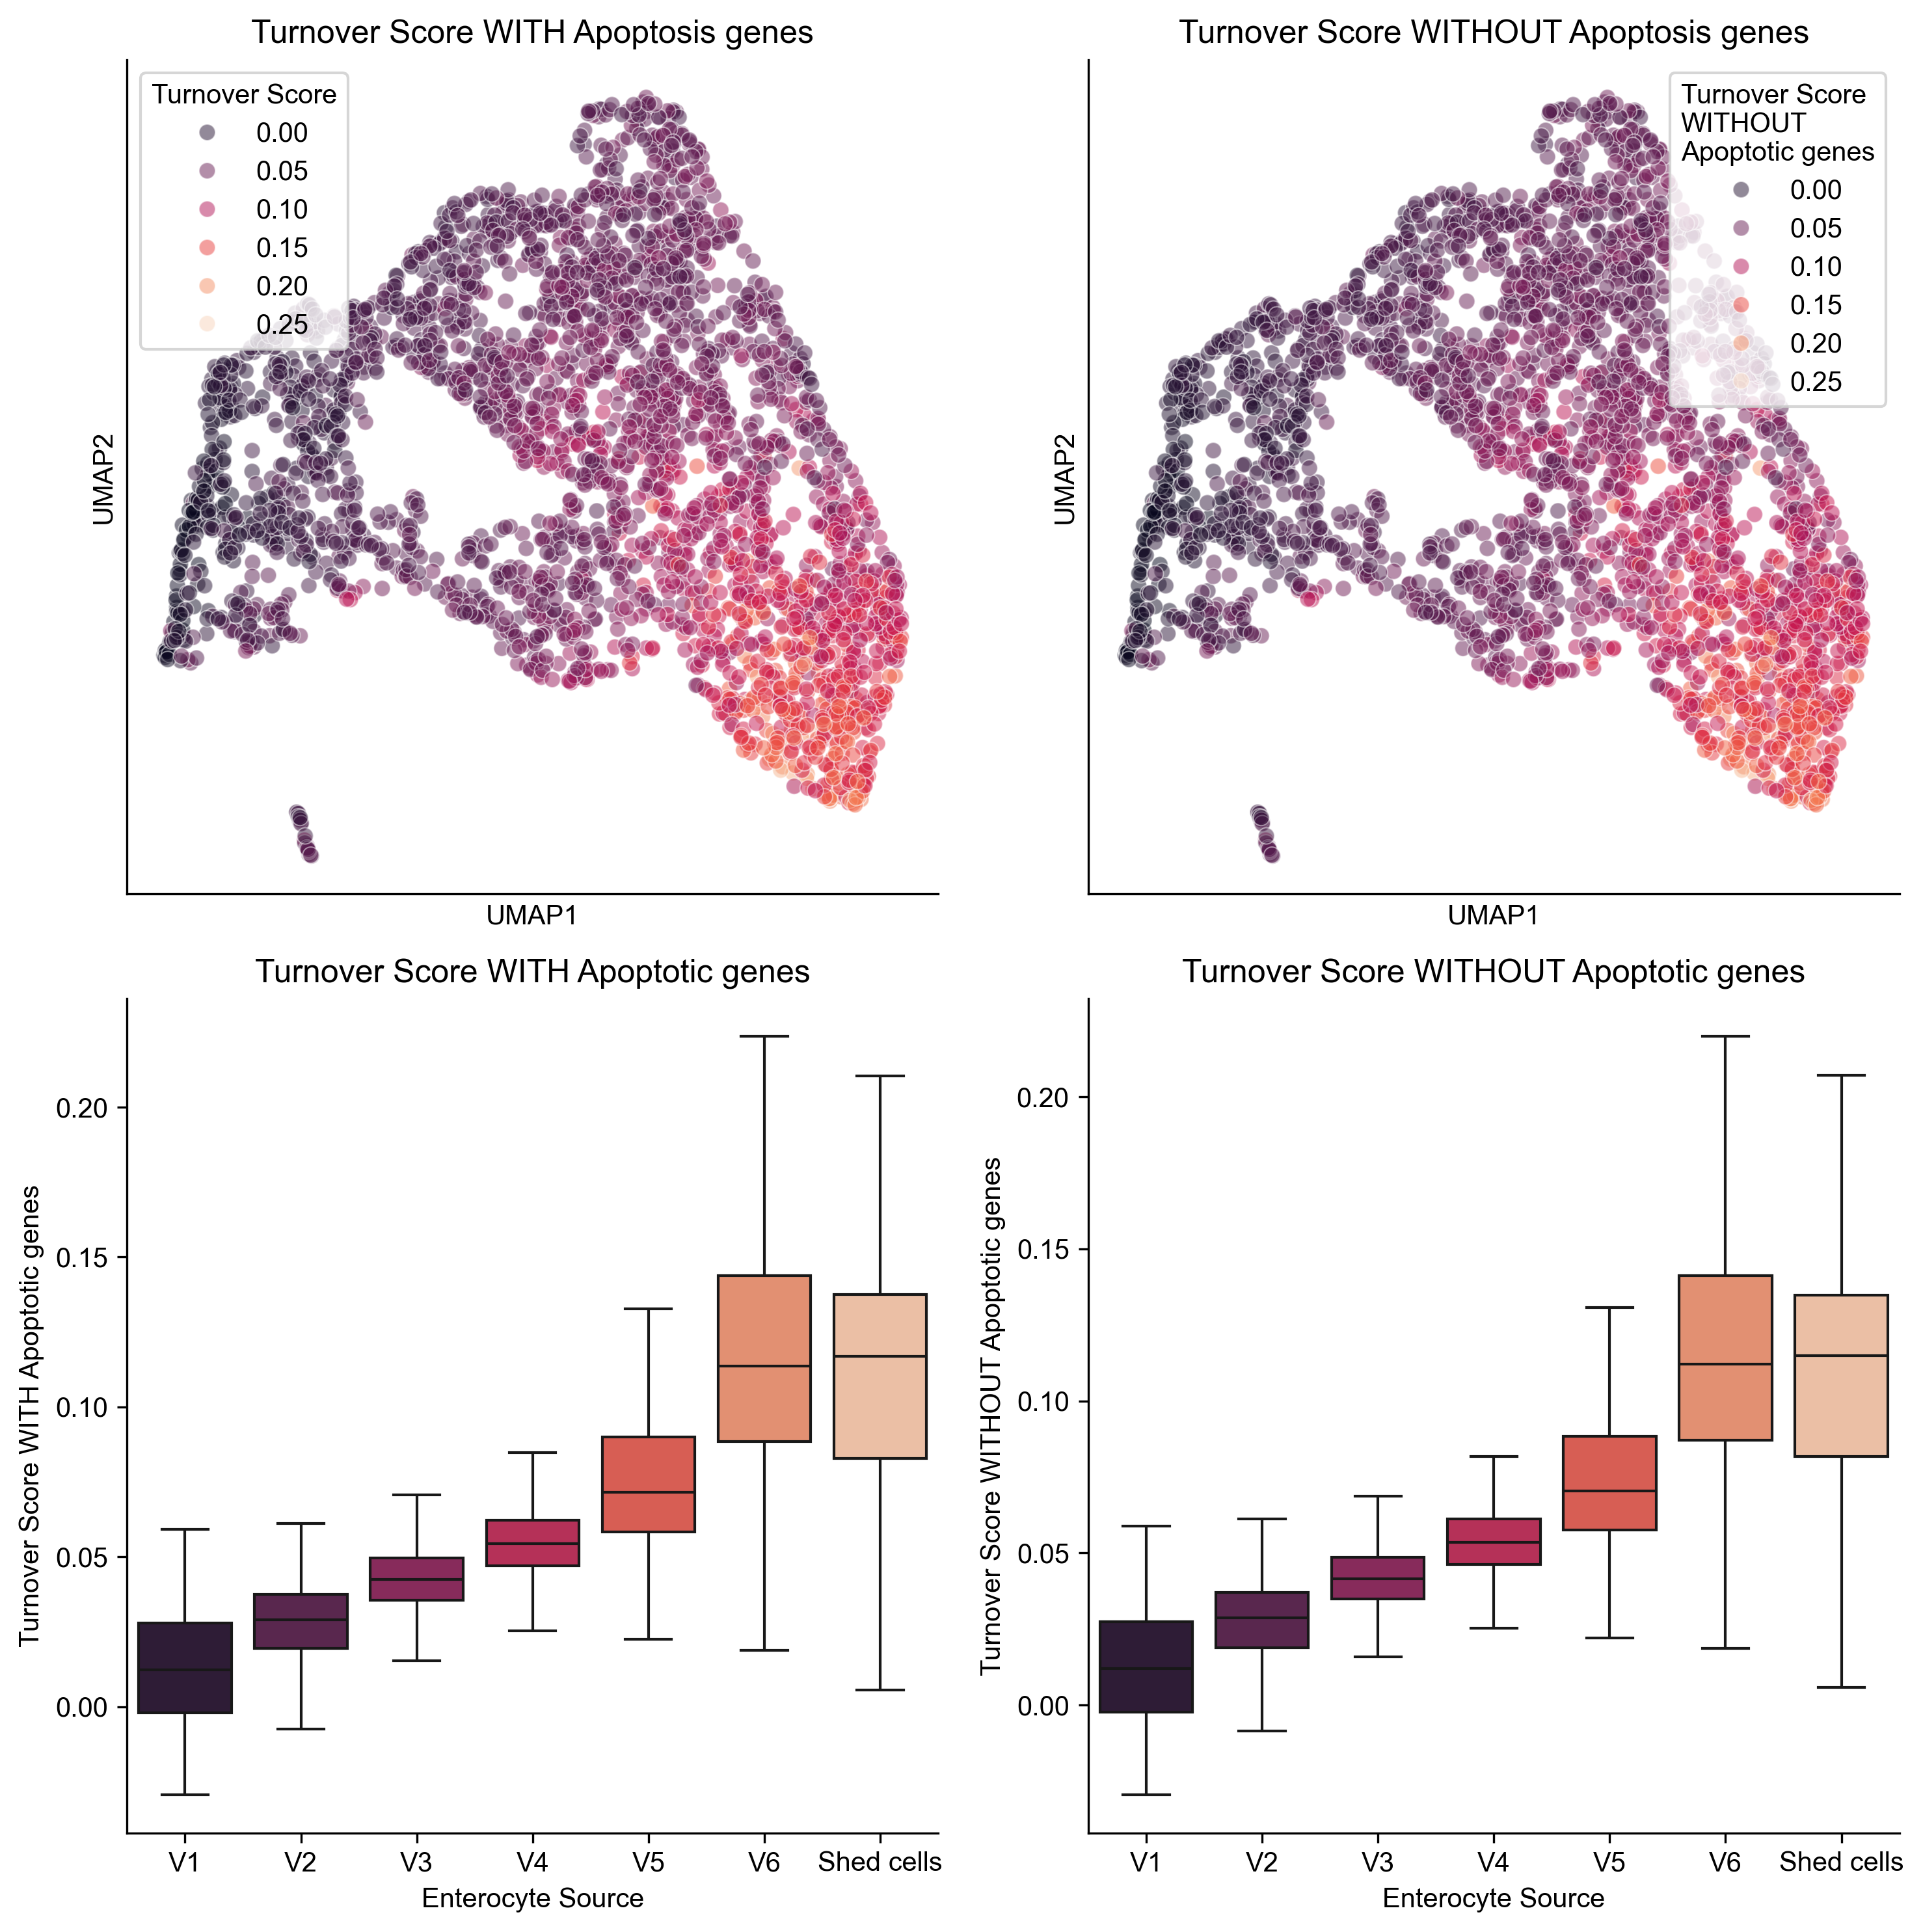

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=300)

# First scatter plot for 'eta'
scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='shedding_score', alpha=0.5, ax=axes[0,0], palette='rocket')
axes[0,0].set_title("Turnover Score WITH Apoptosis genes")
scatter.legend(title="Turnover Score")
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])
axes[0,0].set_xlabel("UMAP1")
axes[0,0].set_ylabel("UMAP2")

# Second scatter plot for 'shedding_score'
scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='shedding_score_wo_apoptosis', alpha=0.5, ax=axes[0,1], palette='rocket')
axes[0,1].set_title("Turnover Score WITHOUT Apoptosis genes")
scatter.legend(title="Turnover Score\nWITHOUT\nApoptotic genes")
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_xlabel("UMAP1")
axes[0,1].set_ylabel("UMAP2")

# add violin plots
sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score', ax=axes[1,0], palette='rocket',
               order=["V1","V2","V3","V4","V5","V6","Shed cells"], showfliers=False)
axes[1,0].set_title("Turnover Score WITH Apoptotic genes")
axes[1,0].set_ylabel("Turnover Score WITH Apoptotic genes")
axes[1,0].set_xlabel("Enterocyte Source")

# Second scatter plot for 'shedding_score'
sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes[1,1], palette='rocket',
               order=["V1","V2","V3","V4","V5","V6","Shed cells"], showfliers=False)
axes[1,1].set_title("Turnover Score WITHOUT Apoptotic genes")
axes[1,1].set_ylabel("Turnover Score WITHOUT Apoptotic genes")
axes[1,1].set_xlabel("Enterocyte Source")

# global changes
for ii in range(2):
    for jj in range(2):
        sns.despine(ax=axes[ii,jj], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()
# save as pdf
# fig.savefig(apoptosis_edf_path + "KerenUMAPS_apoptosis.pdf", bbox_inches='tight', dpi=300)

In [15]:
# fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=300)
# # add violin plots
# sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score', ax=axes[0], palette='rocket',
#                order=["V1","V2","V3","V4","V5","V6","Shed cells"], showfliers=False)
# axes[0].set_title("Turnover Score\nWITH Apoptotic Genes")
# axes[0].set_ylabel("Turnover Score")
# axes[0].set_xlabel("Enterocyte Source")


# # Second scatter plot for 'shedding_score'
# sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes[1], palette='rocket',
#                order=["V1","V2","V3","V4","V5","V6","Shed cells"], showfliers=False)
# axes[1].set_title("Turnover Score\nWITHOUT Apoptotic Genes")
# axes[1].set_ylabel("Turnover Score")
# axes[1].set_xlabel("Enterocyte Source")

# # global changes
# for ii in range(2):
#     axes[ii].set_xticklabels(axes[ii].get_xticklabels(), rotation=45, ha='right')
#     sns.despine(ax=axes[ii], top=True, right=True, left=False, bottom=False)

# plt.tight_layout()
# plt.show()
# # save as pdf
# fig.savefig(apoptosis_edf_path + "Keren_apoptosis_boxplots.pdf", bbox_inches='tight', dpi=300)

In [16]:
group_counts = shed_ad_epi.obs['detailed_source'].value_counts()

/tmp/ipykernel_236887/1824142157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes,
/tmp/ipykernel_236887/1824142157.py:4: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes,
/tmp/ipykernel_236887/1824142157.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(xticklabels, rotation=45, ha='right')


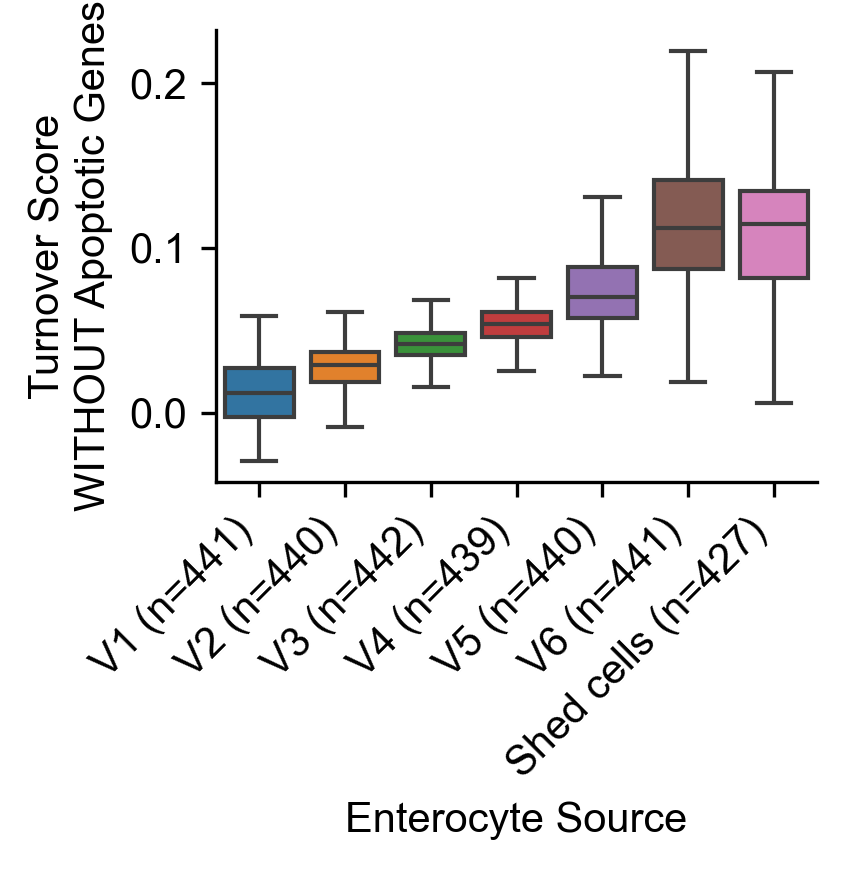

In [17]:
ordered_groups = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'Shed cells']

fig, axes = plt.subplots(1, 1, figsize=(3, 3), dpi=300)
sns.boxplot(data=shed_ad_epi.obs, x='detailed_source', y='shedding_score_wo_apoptosis', ax=axes,
               order=ordered_groups, showfliers=False, palette=sns.color_palette())
axes.set_ylabel("Turnover Score\nWITHOUT Apoptotic Genes")
axes.set_xlabel("Enterocyte Source")

xticklabels = [f"{zone} (n={group_counts[zone]})" for zone in ordered_groups]
# axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_xticklabels(xticklabels, rotation=45, ha='right')
sns.despine(ax=axes, top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()
# save as pdf
fig.savefig(apoptosis_edf_path + "Keren_apoptosis_boxplots.pdf", bbox_inches='tight', dpi=300)

Spearman correlation between shedding scores: 0.9997978971767157, p-value: 0.0


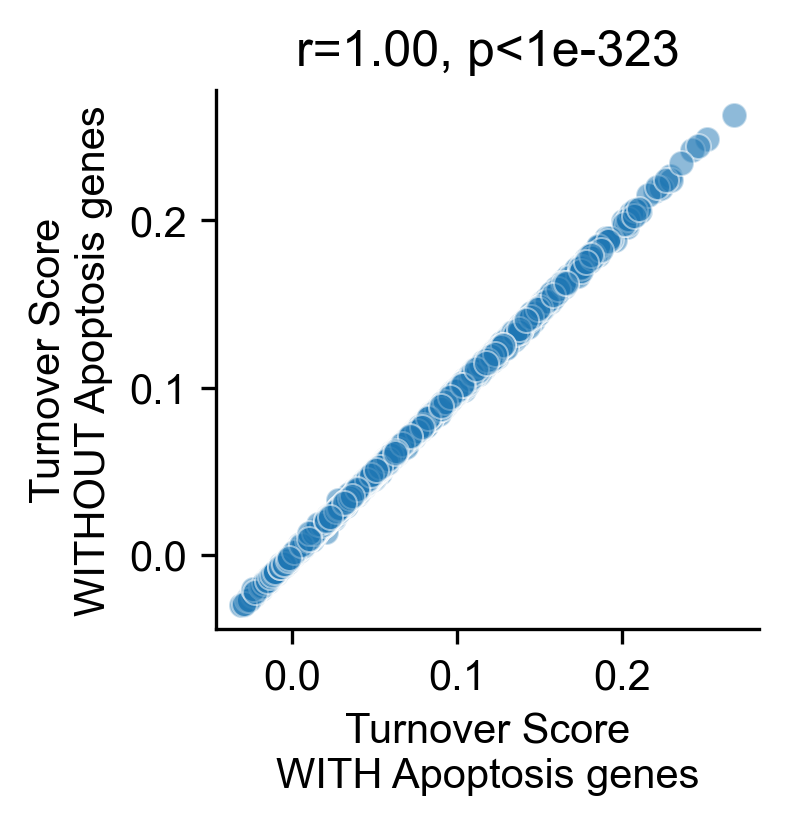

In [18]:
# add spearman correlation
my_fig_size = (7/3,7/3)
fig, ax = plt.subplots(1, 1, figsize=my_fig_size, dpi=300)
[r,p] = scipy.stats.spearmanr(shed_ad_epi.obs['shedding_score'], shed_ad_epi.obs['shedding_score_wo_apoptosis'])
print("Spearman correlation between shedding scores: " + str(r) + ", p-value: " + str(p))
sns.scatterplot(data=shed_ad_epi.obs, x='shedding_score', y='shedding_score_wo_apoptosis', alpha=0.5)
plt.xlabel("Turnover Score\nWITH Apoptosis genes")
plt.ylabel("Turnover Score\nWITHOUT Apoptosis genes")
if p == 0:
    p_str = "<1e-323"
else:
    p_str = str(f"{r:.4f}")
plt.title("r=" + f"{r:.2f}" + ", p" + p_str)
sns.despine()
plt.show()
# save as pdf
fig.savefig(apoptosis_edf_path + "KerenUMAPS_apoptosis_spearman.pdf", bbox_inches='tight', dpi=300)

In [19]:
shed_ad_epi.obs.detailed_source = shed_ad_epi.obs.detailed_source.astype('category')
shed_ad_epi.obs.detailed_source = shed_ad_epi.obs.detailed_source.cat.reorder_categories(['V1','V2','V3','V4','V5','V6','Shed cells'])

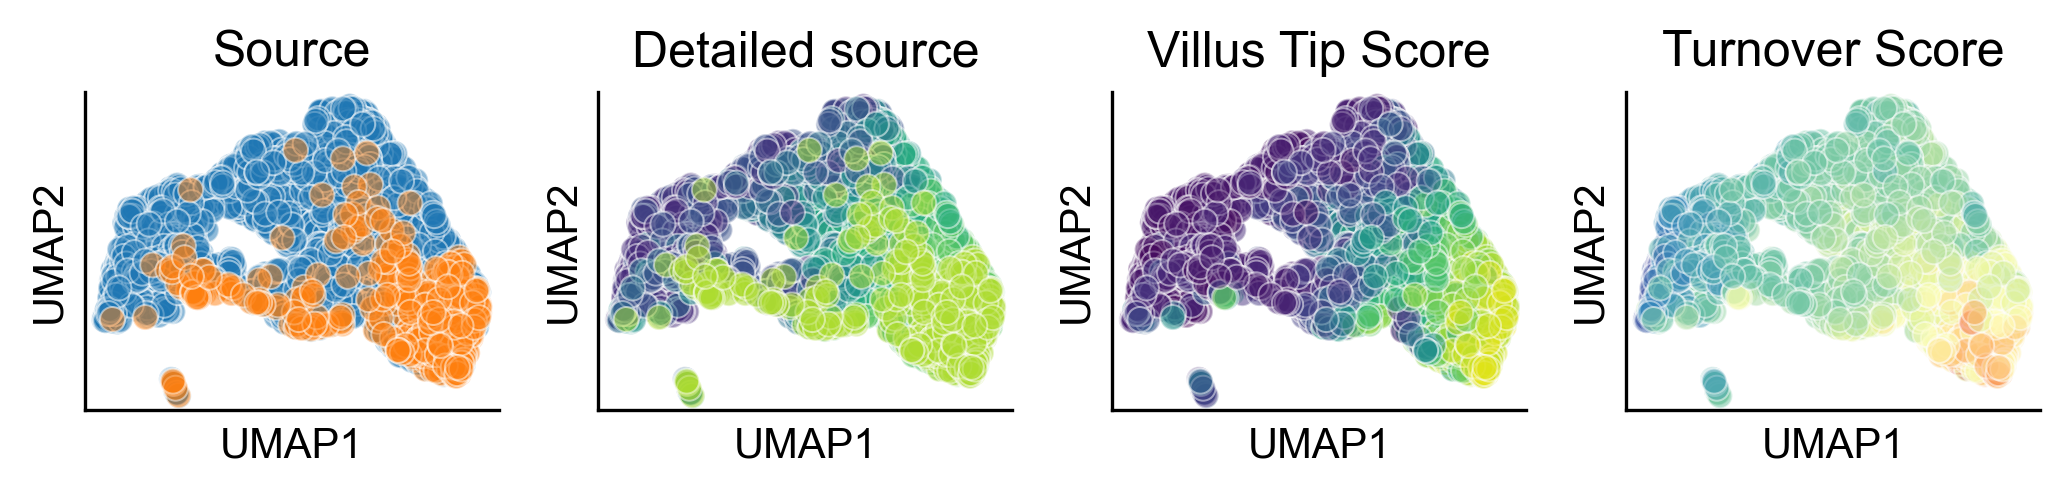

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3.5/2), dpi=300)

# First scatter plot for 'eta'
scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='eta', alpha=0.5, ax=axes[2], palette='viridis')
axes[2].set_title("Villus Tip Score")
axes[2].legend(title='Tip Score', loc='upper right')


# Second scatter plot for 'shedding_score'
scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='shedding_score', alpha=0.5, ax=axes[3], palette='Spectral_r')
axes[3].set_title("Turnover Score")
axes[3].legend(title='Turnover Score', loc='upper left')

scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='source', alpha=0.5, ax=axes[0])
axes[0].set_title("Source")
axes[0].legend(title='Source', loc='upper right')

scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='detailed_source', alpha=0.5, ax=axes[1], palette='viridis')
axes[1].set_title("Detailed source")

# change legend order
handles, labels = axes[1].get_legend_handles_labels()
order = ['V1','V2','V3','V4','V5','V6', 'Shed cells']
new_handles = []
new_labels = []
for label in order:
    if label in labels:
        index = labels.index(label)
        new_handles.append(handles[index])
        new_labels.append(labels[index])
axes[1].legend(new_handles, new_labels, title='Detailed Source', loc='upper left')


# global changes
for ii in range(4):
    # for jj in range(2):
        axes[ii].set_xticks([])
        axes[ii].set_yticks([])
        axes[ii].set_xlabel("UMAP1")
        axes[ii].set_ylabel("UMAP2")
        sns.despine(ax=axes[ii], top=True, right=True, left=False, bottom=False)
        # hide legend
        axes[ii].legend_.remove()

plt.tight_layout()
plt.show()
# save as pdf
#fig.savefig(apoptosis_edf_path + "KerenUMAPS_Scores.pdf", bbox_inches='tight', dpi=300)

/tmp/ipykernel_236887/3741126682.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  shed_scatter = sns.scatterplot(data=shed_ad_epi[shed_ad_epi.obs.detailed_source=="Shed cells"].obs, x='x', y='y', color='black',


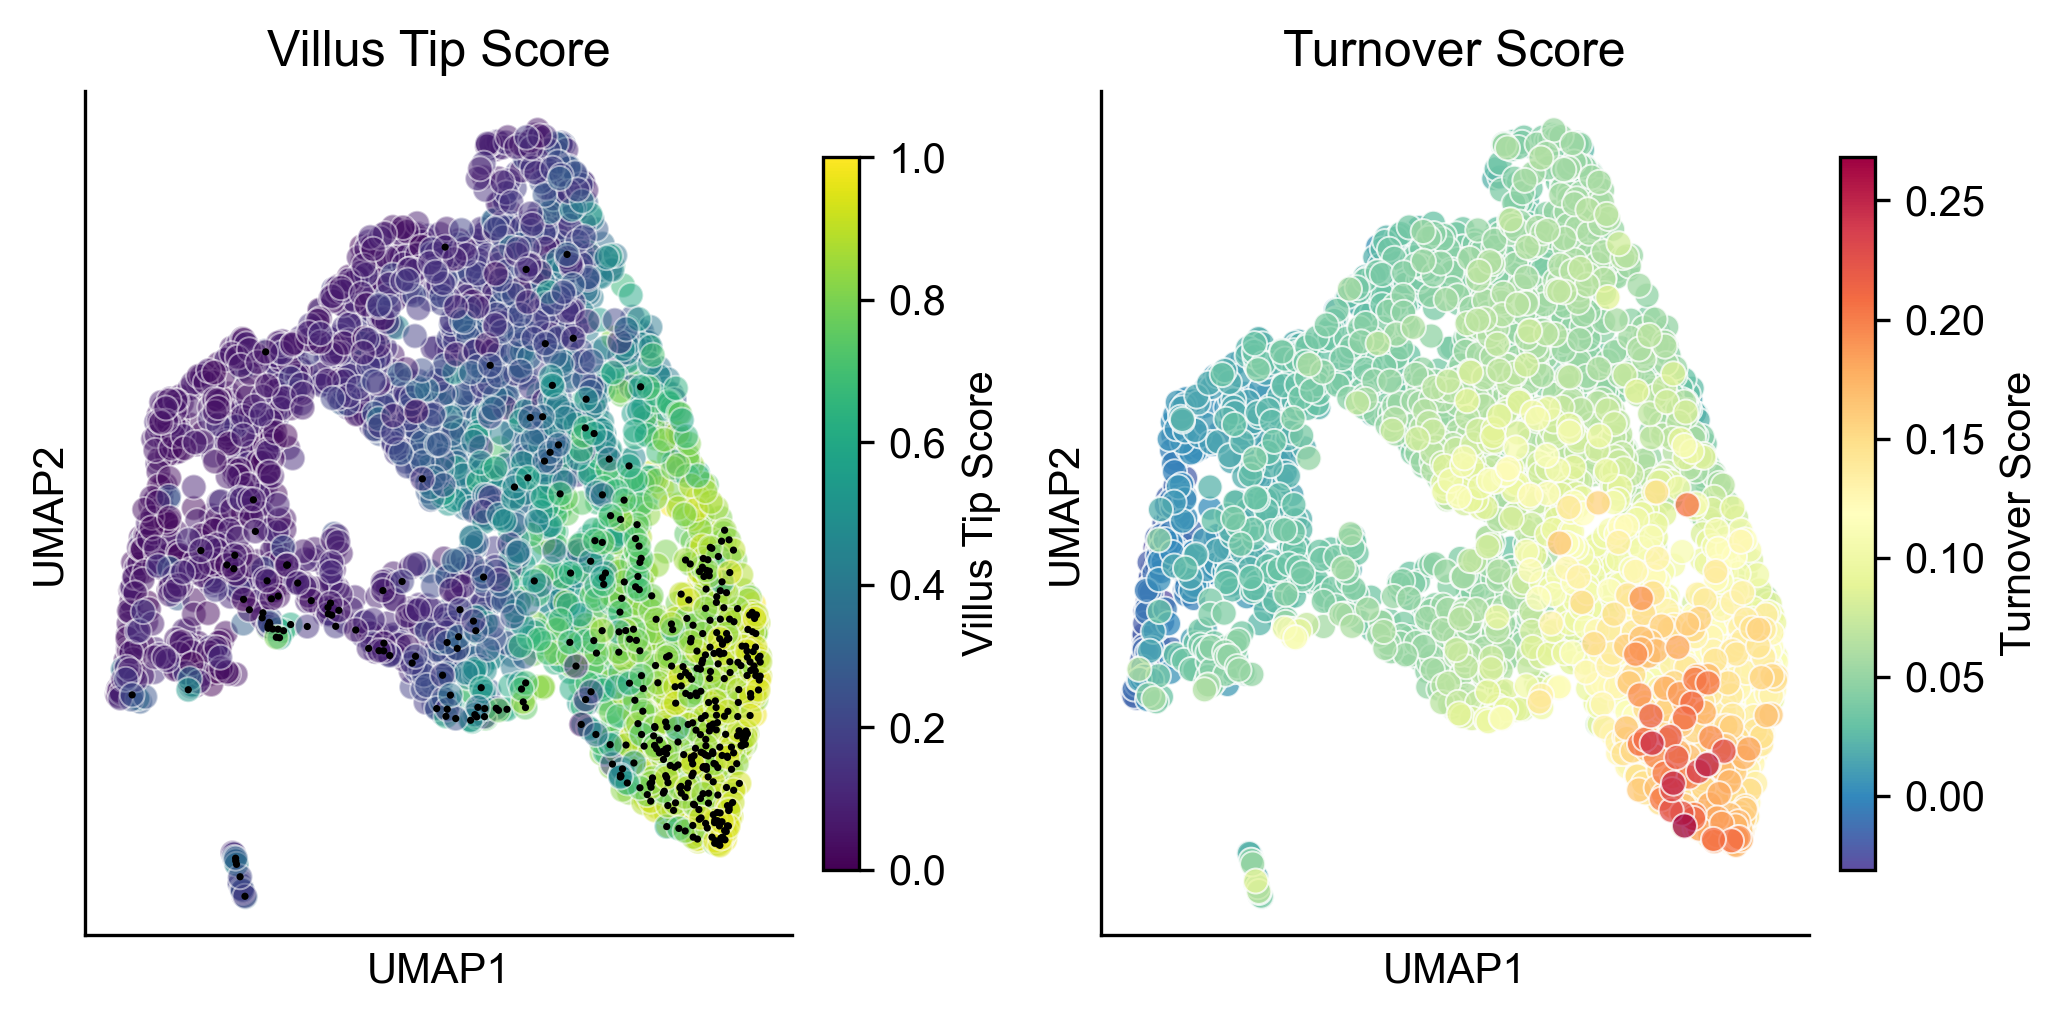

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5), dpi=300)

scatter = sns.scatterplot(data=shed_ad_epi.obs.sort_values(by='shedding_score', ascending=True), 
                           x='x', y='y', hue='shedding_score', alpha=0.75, ax=axes[1], palette='Spectral_r')

# Create a color map for the legend
norm = plt.Normalize(shed_ad_epi.obs['shedding_score'].min(), shed_ad_epi.obs['shedding_score'].max())
cmap = plt.cm.Spectral_r
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the color bar to the plot
cbar = plt.colorbar(sm, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Turnover Score")
axes[1].set_title("Turnover Score")
# hide legend
axes[1].legend_.remove()

scatter = sns.scatterplot(data=shed_ad_epi.obs, x='x', y='y', hue='eta', alpha=0.5, ax=axes[0], palette='viridis')
axes[0].set_title("Source")
# add dots in each shed cell
shed_scatter = sns.scatterplot(data=shed_ad_epi[shed_ad_epi.obs.detailed_source=="Shed cells"].obs, x='x', y='y', color='black',
                                alpha=1, ax=axes[0], palette='viridis', legend=False, s=3, edgecolor='none')
# Create a color map for the legend
norm = plt.Normalize(shed_ad_epi.obs['eta'].min(), shed_ad_epi.obs['eta'].max())
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the color bar to the plot
cbar = plt.colorbar(sm, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Villus Tip Score")
axes[0].set_title("Villus Tip Score")
# hide legend
axes[0].legend_.remove()


# # change legend order
# handles, labels = axes[0].get_legend_handles_labels()
# order = ['V1','V2','V3','V4','V5','V6', 'Shed cells']
# new_handles = []
# new_labels = []
# for label in order:
#     if label in labels:
#         index = labels.index(label)
#         new_handles.append(handles[index])
#         new_labels.append(labels[index])
# axes[0].legend(new_handles, new_labels, title='Detailed Source', loc='upper left')


# global changes
for ii in range(2):
    # for jj in range(2):
        axes[ii].set_xticks([])
        axes[ii].set_yticks([])
        axes[ii].set_xlabel("UMAP1")
        axes[ii].set_ylabel("UMAP2")
        sns.despine(ax=axes[ii], top=True, right=True, left=False, bottom=False)
        # hide legend
        # axes[ii].legend_.remove()

plt.tight_layout()
plt.show()
# save as pdf
fig.savefig(apoptosis_edf_path + "KerenUMAPS_Scores2.pdf", bbox_inches='tight', dpi=300)

In [22]:
# Calculate the number of cells in each group
group_counts = shed_ad_epi.obs['detailed_source'].value_counts()
group_counts

detailed_source
V3            442
V1            441
V6            441
V2            440
V5            440
V4            439
Shed cells    427
Name: count, dtype: int64

/tmp/ipykernel_236887/4118843436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="shedding_score",
/tmp/ipykernel_236887/4118843436.py:5: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="shedding_score",
/tmp/ipykernel_236887/4118843436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="eta",
/tmp/ipykernel_236887/4118843436.py:16: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="eta",


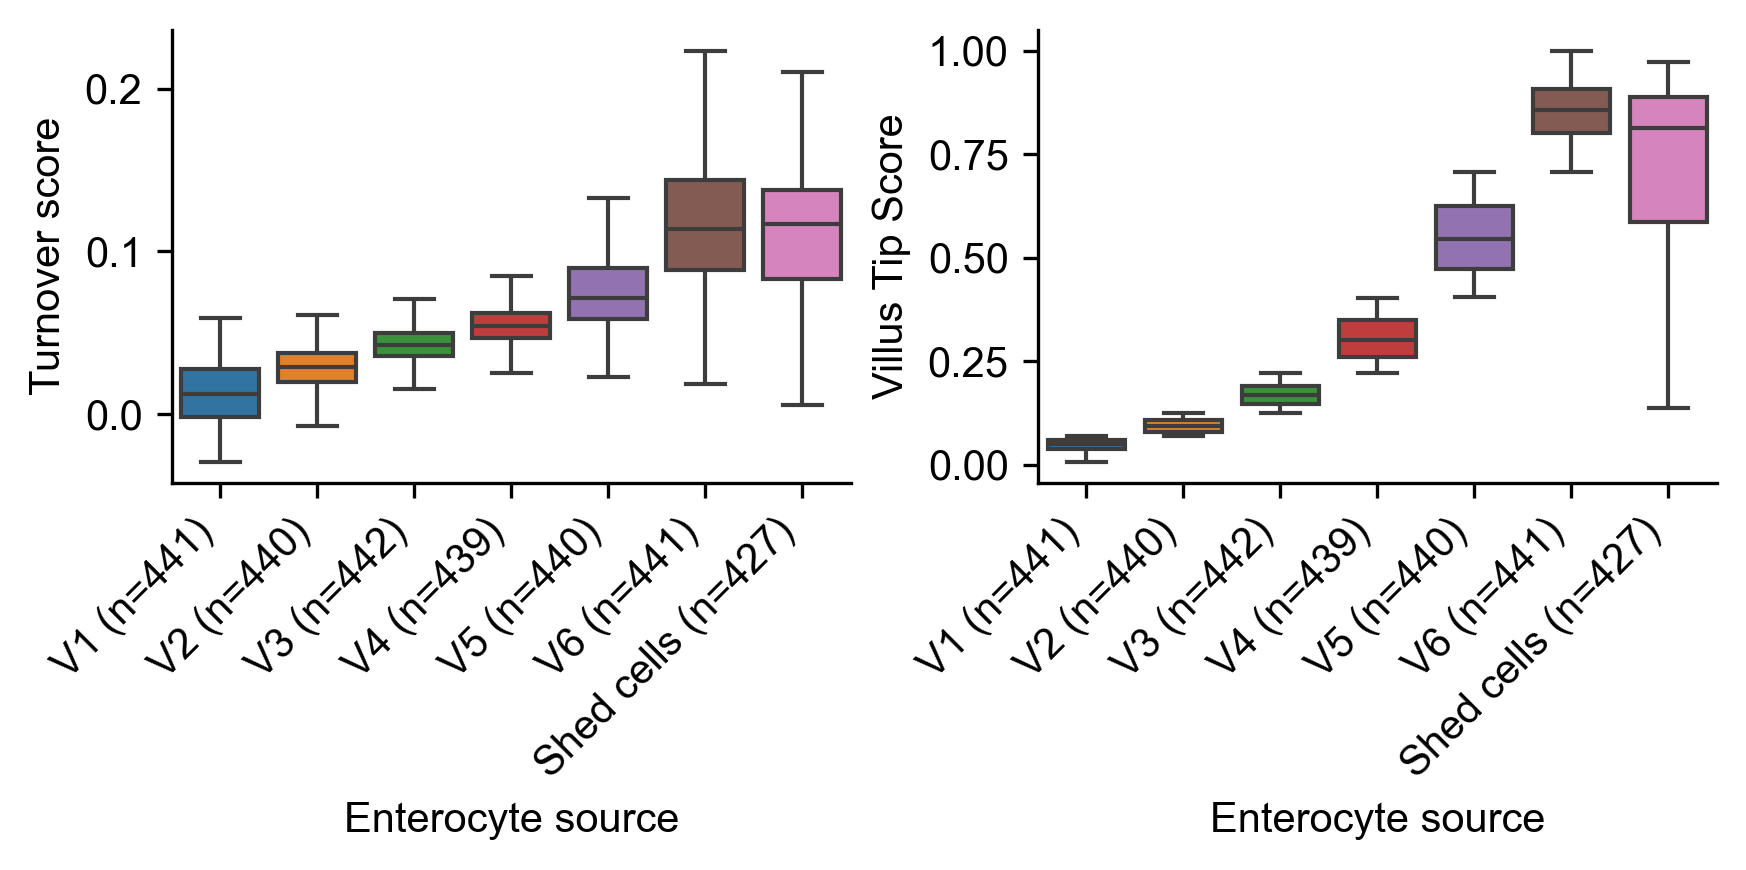

In [23]:
ordered_groups = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'Shed cells']
fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

# Plot for shedding_score
sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="shedding_score", 
            order=ordered_groups, showfliers=False, ax=axes[0], palette=sns.color_palette())
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(ordered_groups, rotation=45, ha='right')

axes[0].set_xticklabels(xticklabels, rotation=45)
axes[0].set_ylabel("Turnover score")
axes[0].set_xlabel("Enterocyte source")
sns.despine(ax=axes[0])

# Plot for eta
sns.boxplot(data=shed_ad_epi.obs, x="detailed_source", y="eta", 
            order=ordered_groups, showfliers=False, ax=axes[1], palette=sns.color_palette())
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(ordered_groups, rotation=45, ha='right')
axes[1].set_xticklabels(xticklabels, rotation=45)
axes[1].set_ylabel("Villus Tip Score")
axes[1].set_xlabel("Enterocyte source")
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()
# save as pdf
fig.savefig(apoptosis_edf_path + "KerenUMAPS_Scores_boxplots.pdf", bbox_inches='tight', dpi=300)

In [24]:
# compare turnover score between V6 and shed cells
v6_turnover_score = shed_ad_epi.obs.loc[shed_ad_epi.obs['detailed_source'] == "V6", 'shedding_score']
shed_turnover_score = shed_ad_epi.obs.loc[shed_ad_epi.obs['detailed_source'] == "Shed cells", 'shedding_score']

# calculate p-value using wilcoxon test
from scipy import stats
[_, p_val] = stats.ranksums(v6_turnover_score, shed_turnover_score)
print("Wilcoxon rank sum test p-value: " + str(p_val))

Wilcoxon rank sum test p-value: 0.10727157776402244


/tmp/ipykernel_236887/1278473192.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=45, ha='right')


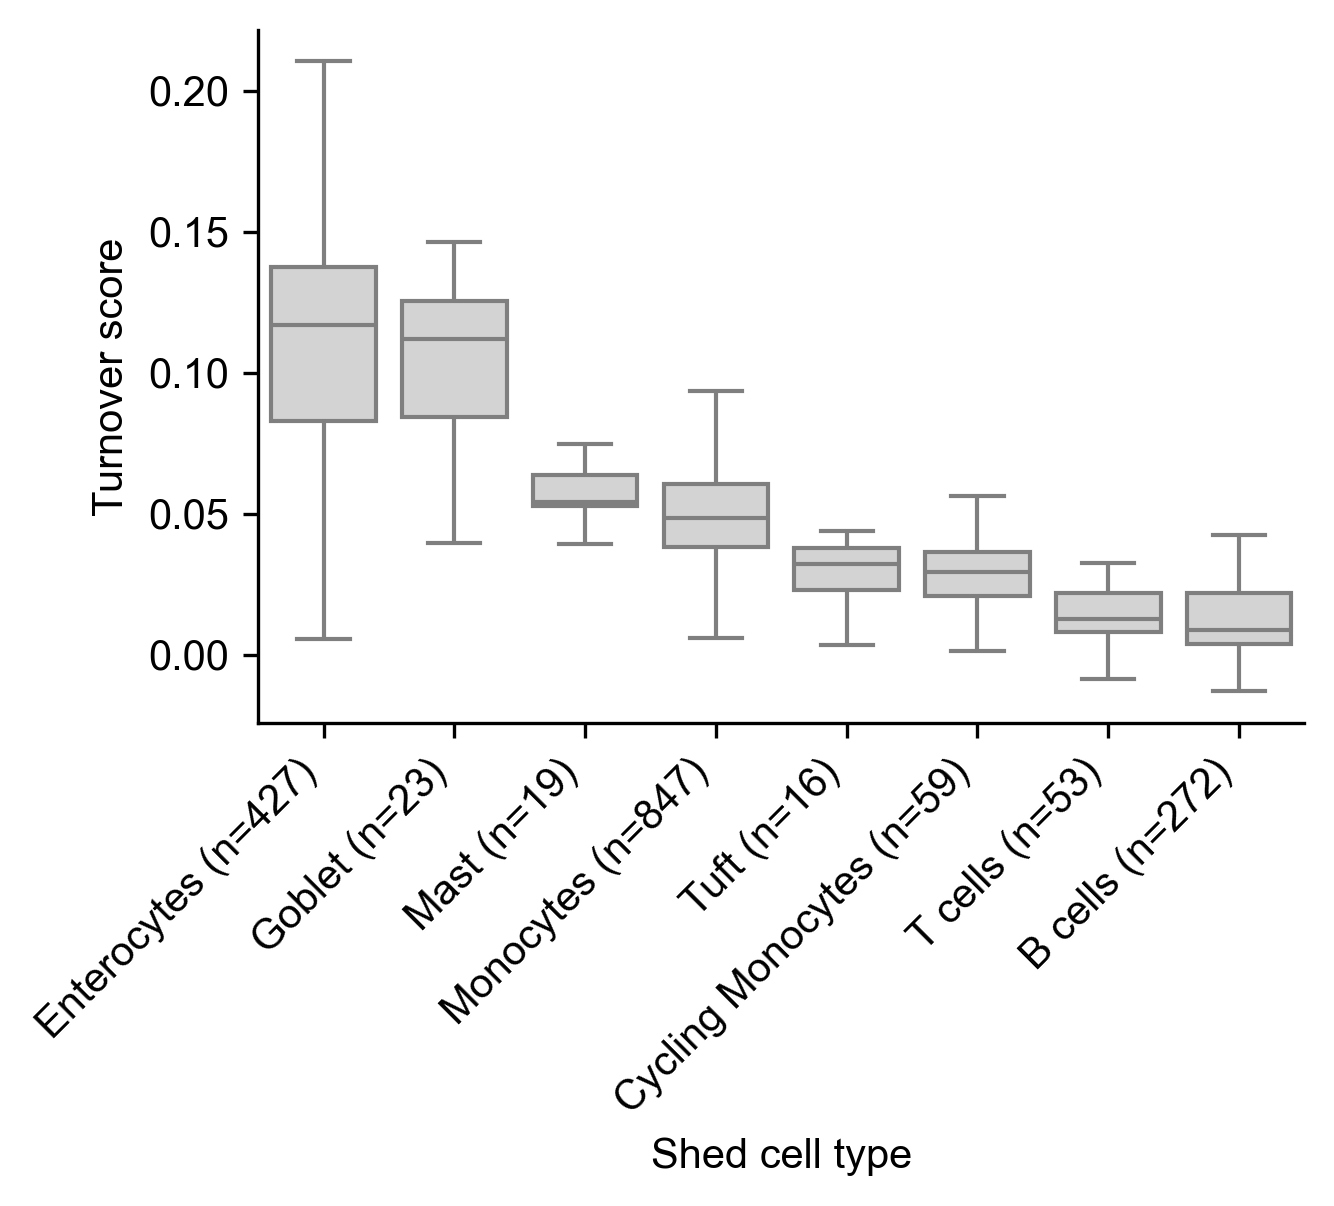

In [25]:
fig,ax = plt.subplots(1, 1, figsize=(4.5, 3), dpi=300)
# Calculate the median shedding score for each Idents group
group_medians = shed_ad_all.obs.groupby("Idents")["shedding_score"].median()

# Sort the Idents groups by the median shedding score
sorted_groups = group_medians.sort_values(ascending=False).index

# count the number of cells in each group
group_counts = shed_ad_all.obs['Idents'].value_counts().reindex(sorted_groups)
# create xticklabels with the group names and counts
xticklabels = [f"{group} (n={count})" for group, count in zip(sorted_groups, group_counts)]

# Plot the boxplot with the groups ordered by the median shedding score
sns.boxplot(shed_ad_all.obs, x="Idents", y="shedding_score", showfliers=False, order=sorted_groups, color='lightgray')  
plt.xticks(rotation=90)
plt.ylabel("Turnover score")
plt.xlabel("Shed cell type")
ax.set_xticklabels(xticklabels, rotation=45, ha='right')
# rotate x-axis labels
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

# save as pdf
fig.savefig(apoptosis_edf_path + "Keren_Shed_cell_types_boxplots.pdf", bbox_inches='tight', dpi=300)

## mRNA stability

In [26]:
# load mRNA half-life data
mrna_quant = pd.read_excel(paper_path+"/external_datasets/schwanhasusser_global_quantification_TableS3.xls")
print(mrna_quant.shape)
# remove rows with NaN gene names
mrna_quant = mrna_quant[~mrna_quant['Gene Names'].isna()]
print(mrna_quant.shape)
mrna_quant.head(2)

(5028, 29)
(4884, 29)


Protein IDs  \
0  IPI00229543.3;IPI00221463.3;IPI00265761.6;IPI0...   
1  IPI00624840.2;IPI00623776.3;IPI00624933.1;IPI0...   

                                       Protein Names  \
0  Histone H2A type 1-F;Histone H2A type 3;Histon...   
1                                         Histone H4   

                                          Gene Names  \
0  Hist1h2af;Hist3h2a;Hist1h2ab;Hist1h2ac;Hist1h2...   
1  Hist1h4a;Hist1h4b;H4-53;Hist1h4c;H4-12;Hist1h4...   

                                Protein Descriptions  \
0  Histone H2A type 1-F;Histone H2A type 3;Histon...   
1  12 kDa protein;similar to histone H4;12 kDa pr...   

                                         Uniprot IDs  \
0  Q8CGP5;Q61668;Q8BFU2;A2AB79;P22752;B2RVF0;Q8CG...   
1                        P62806;B2RTM0;Q61667;Q6B822   

                                  RefSeq protein IDs Refseq mRNA ID  \
0  NP_783592;NP_835736;NP_783591;NP_835489;NP_835...            NaN   
1  XP_981474;NP_291074;NP_694813;NP_783583;NP_783...            NaN   

                                          ENSEMBL ID  \
0  ENSMUST00000073261;ENSMUST00000108817;ENSMUST0...   
1  ENSMUST00000073009;ENSMUST00000075596;ENSMUST0...   

                                              MGI ID  \
0  MGI:2448309;MGI:2448458;MGI:2448306;MGI:244828...   
1  MGI:2448419;MGI:2448420;MGI:2448421;MGI:244842...   

   Protein length [amino acids]  ...  Protein half-life average [h]  \
0                           130  ...                          94.71   
1                           105  ...                         104.65   

   mRNA half-life experiment [h]  mRNA half-life replicate [h]  \
0                            NaN                           NaN   
1                            NaN                           NaN   

   mRNA half-life average [h]  \
0                         NaN   
1                         NaN   

   transcription rate (vsr) experiment [molecules/(cell*h)]  \
0                                                NaN          
1                                                NaN          

   transcription rate (vsr) replicate [molecules/(cell*h)]  \
0                                                NaN         
1                                                NaN         

   transcription rate (vsr) average [molecules/(cell*h)]  \
0                                                NaN       
1                                                NaN       

   translation rate constant (ksp) experiment [molecules/(mRNA*h)]  \
0                                                NaN                 
1                                                NaN                 

   translation rate constant (ksp) replicate [molecules/(mRNA*h)]  \
0                                                NaN                
1                                                NaN                

   translation rate constant (ksp) average [molecules/(mRNA*h)]  
0                                                NaN             
1                                                NaN             

[2 rows x 29 columns]

In [27]:
# add mRNA half-life to the residuals df
resids['mrna_half_life'] = np.nan
for gene in tqdm(resids.index):
    gene_mask = mrna_quant['Gene Names'].str.contains(gene)

    if gene_mask.sum() == 1:
        resids.loc[gene, 'mrna_half_life'] = mrna_quant['mRNA half-life average [h]'].iloc[np.where(gene_mask)[0]].values[0]

resids.head()

100%|██████████| 17891/17891 [00:31<00:00, 575.39it/s]


biopsy      wash  log_biopsy  log_wash  residual  \
0610007P14Rik  0.000043  0.000015   -4.277445 -4.593824 -0.287002   
0610009B22Rik  0.000029  0.000020   -4.405564 -4.517298 -0.086989   
0610009L18Rik  0.000005  0.000002   -4.823506 -4.934358 -0.101219   
0610009O20Rik  0.000003  0.000001   -4.881434 -4.955394 -0.066422   
0610010F05Rik  0.000009  0.000006   -4.722081 -4.784496 -0.049116   

               mrna_half_life  
0610007P14Rik             NaN  
0610009B22Rik            3.76  
0610009L18Rik             NaN  
0610009O20Rik             NaN  
0610010F05Rik             NaN

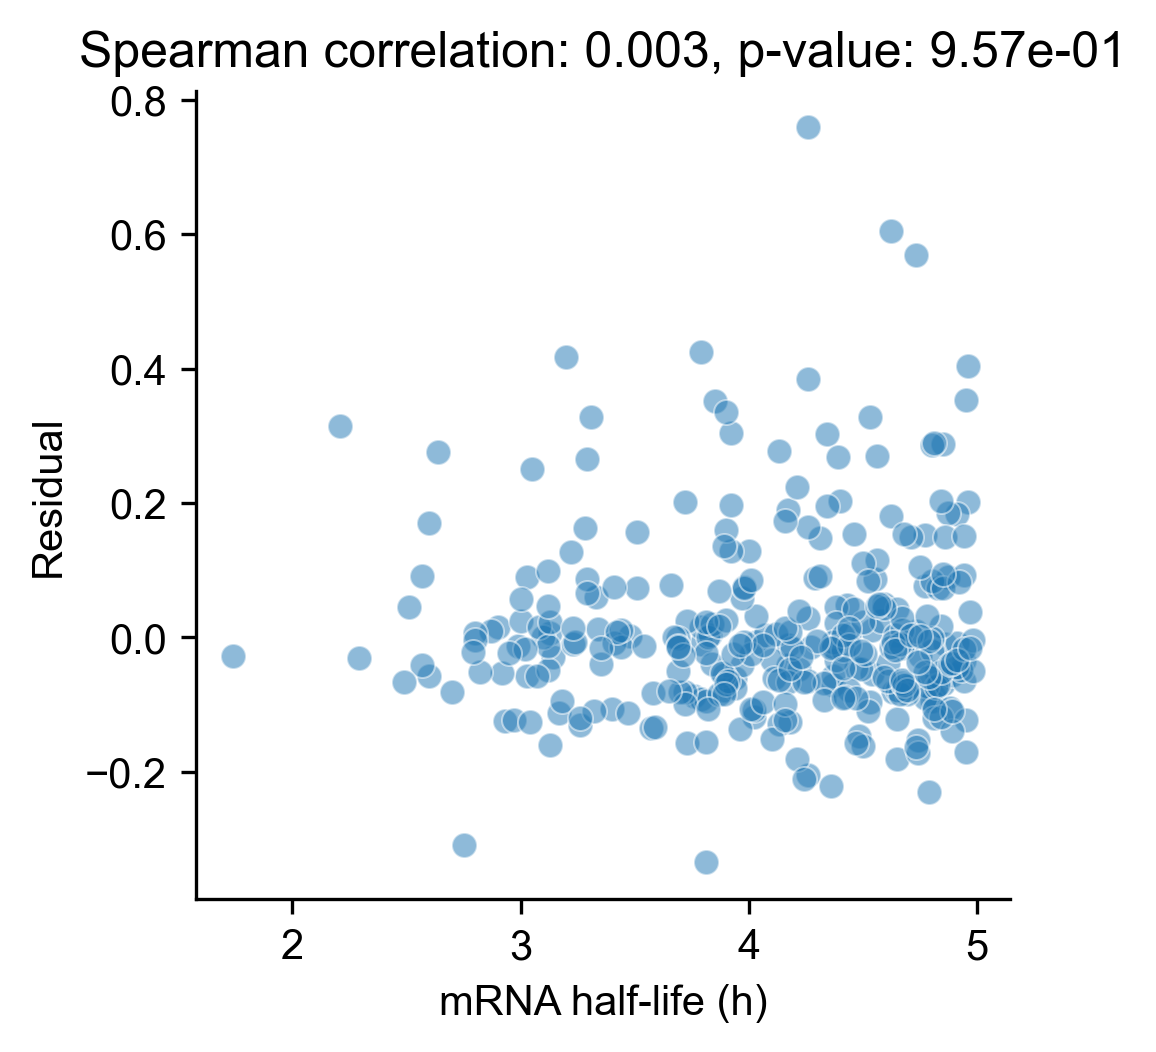

In [28]:
MAX_MRNA_HL = 5
MIN_EXP = 1e-6
x_field = "mrna_half_life" #"log_biopsy"
y_field = "residual"
non_nan_resids = resids[~resids['mrna_half_life'].isna()]
non_nan_resids = non_nan_resids[non_nan_resids['mrna_half_life'] < MAX_MRNA_HL]
non_nan_resids = non_nan_resids[non_nan_resids[['wash','biopsy']].max(axis=1) > MIN_EXP]
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5), dpi=300)
sns.scatterplot(data=non_nan_resids, x=x_field, y=y_field, alpha=0.5,ax=ax)

# add spearman correlation
[r,p] = scipy.stats.spearmanr(non_nan_resids[x_field], non_nan_resids[y_field])
# add line to plot
# sns.regplot(data=non_nan_resids, x=x_field, y=y_field, scatter=False, 
#             line_kws={"color": "black", "alpha": 0.7}, ci=None)
plt.title("Spearman correlation: " + f"{r:.3f}" + ", p-value: " + f"{p:.2e}")
if x_field == "mrna_half_life":
    plt.xlabel("mRNA half-life (h)")
else:
    plt.xlabel(x_field)
plt.ylabel(y_field.capitalize())
sns.despine()
plt.show()
fig.savefig(paper_path + "/reviewer_figures/EDF_RevFig_mRNA_stability.pdf", bbox_inches='tight', dpi=300)

In [29]:
print(datetime.now())

2025-07-10 10:30:19.527935
